<a href="https://colab.research.google.com/github/segnig/Tanzania-Tourism-Prediction/blob/main/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
FILE_PATH = "/content/drive/MyDrive/Data Science/Tanzania Tourism Prediction/"

# Import Libraries


*   `pandas` for data manipulation.
*   `numpy` for mathematics.
*   `matplotlib.pyplot` and `seaborn`  for data visualization.




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# ignore warning
import warnings
warnings.filterwarnings("ignore")

# File Path


In [3]:
TRAIN_FILE_PATH = FILE_PATH + "Train.csv"
TEST_FILE_PATH = FILE_PATH + "Test.csv"

## Load Data

Load data to DataFrame

In [4]:
train_df = pd.read_csv(TRAIN_FILE_PATH)
test_df = pd.read_csv(TEST_FILE_PATH)

**Shape of train data**

In [5]:
print("Length of train dataset:", train_df.shape)

Length of train dataset: (4809, 23)


In [6]:
train_df.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


**Dataframe informations**

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [8]:
# Cardinality of the features across data
cardinality = train_df.nunique().sort_values(ascending=False)

# cardinality two
cardinality_2 = (cardinality[cardinality.values == 2].index).to_list()
cardinality_2

['package_insurance',
 'first_trip_tz',
 'package_food',
 'package_guided_tour',
 'package_sightseeing',
 'package_transport_tz',
 'package_transport_int',
 'tour_arrangement',
 'package_accomodation']

In [9]:
# Data values for feature which have two cardinality
train_df[cardinality_2].head()

,package_insurance,first_trip_tz,package_food,package_guided_tour,package_sightseeing,package_transport_tz,package_transport_int,tour_arrangement,package_accomodation
0,No,No,No,No,No,No,No,Independent,No
1,No,Yes,No,No,No,No,No,Independent,No
2,No,No,No,No,No,No,No,Independent,No
3,No,Yes,Yes,Yes,Yes,Yes,No,Package Tour,Yes
4,No,Yes,No,No,No,No,No,Independent,No


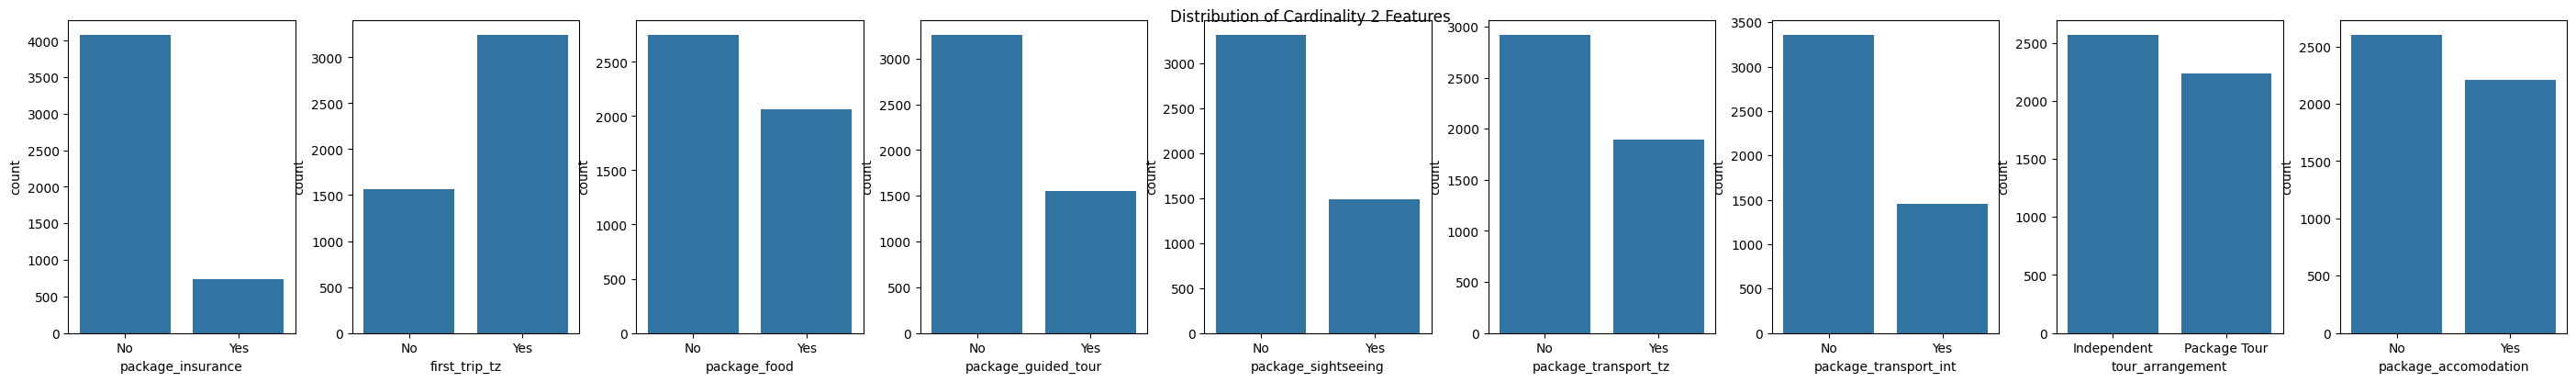

In [10]:
# plot distribution for cardinality_2 features
fig, ax = plt.subplots(1, len(cardinality_2))
fig.set_size_inches(28, 4)
fig.tight_layout()
fig.suptitle("Distribution of Cardinality 2 Features")

for i in range(len(cardinality_2)):
    sns.countplot(x=cardinality_2[i], data=train_df, ax=ax[i])

Distribution of two cardinal feature [box-plot]

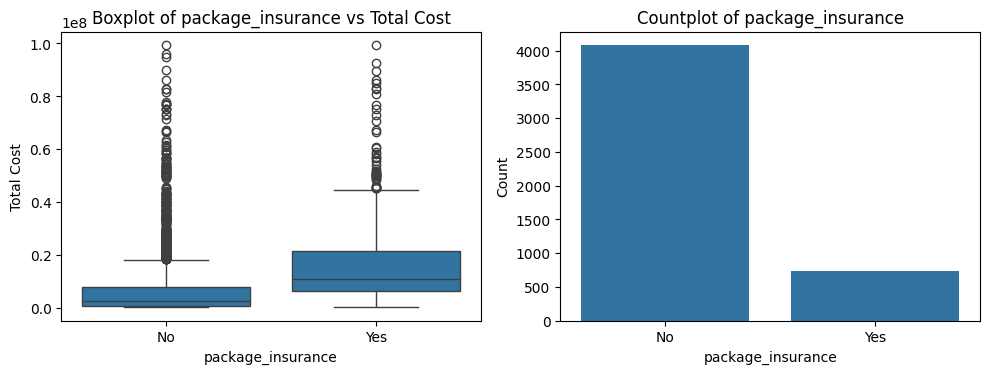

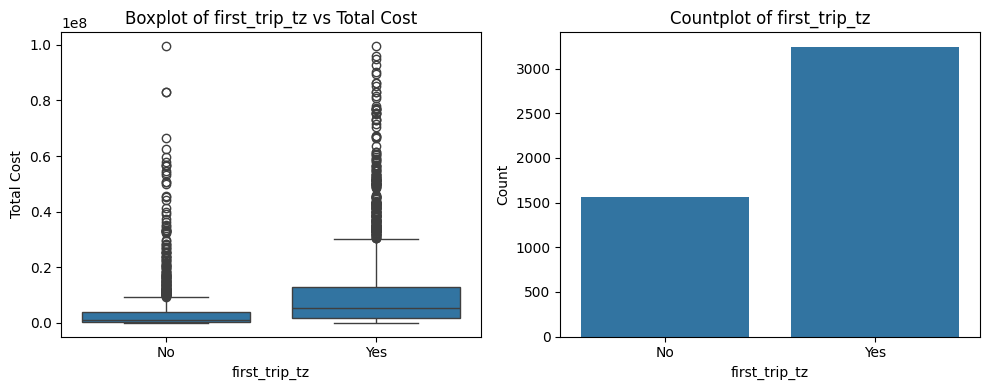

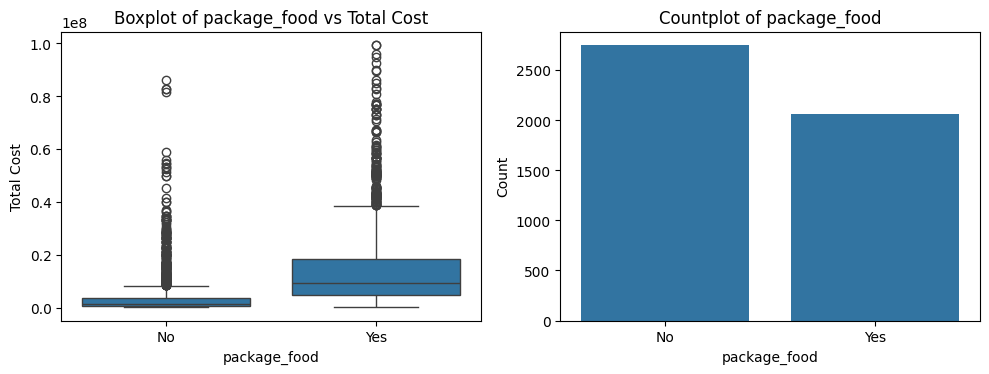

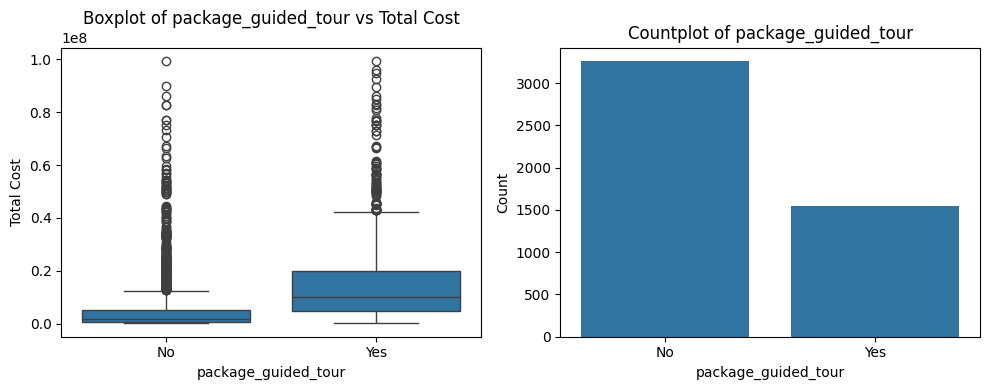

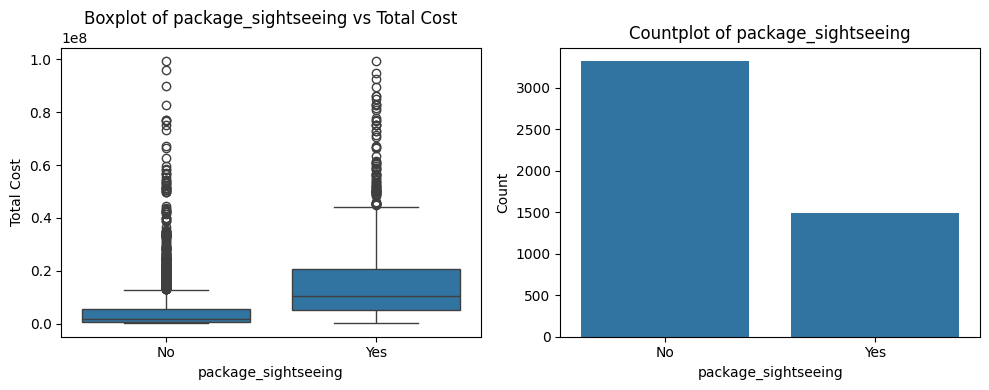

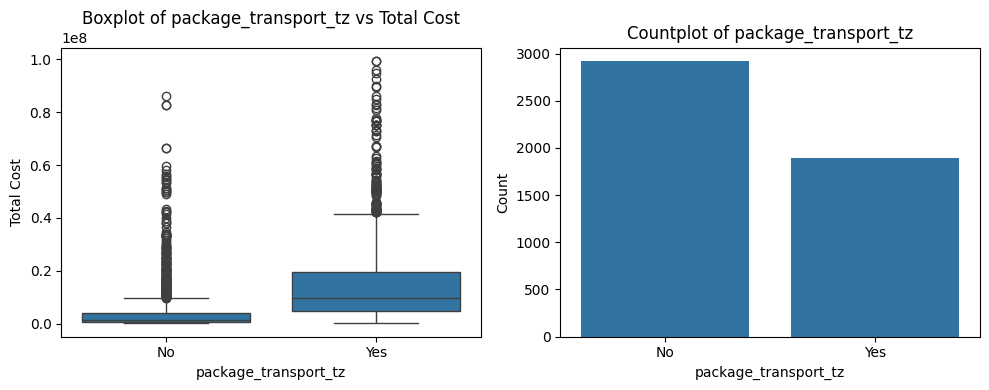

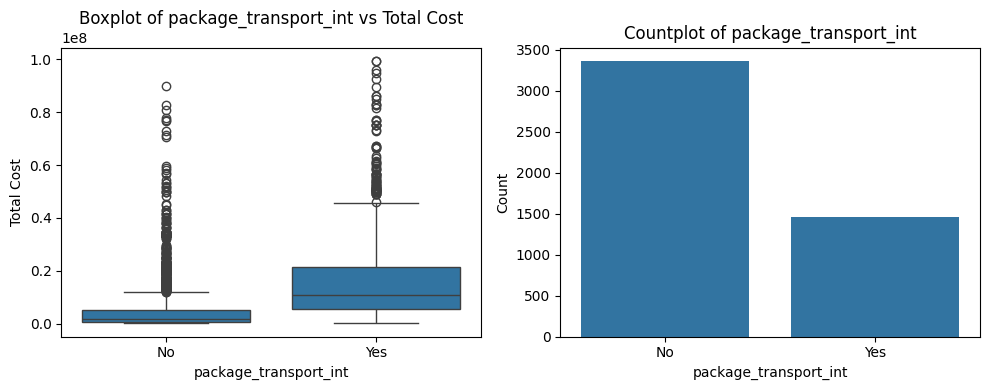

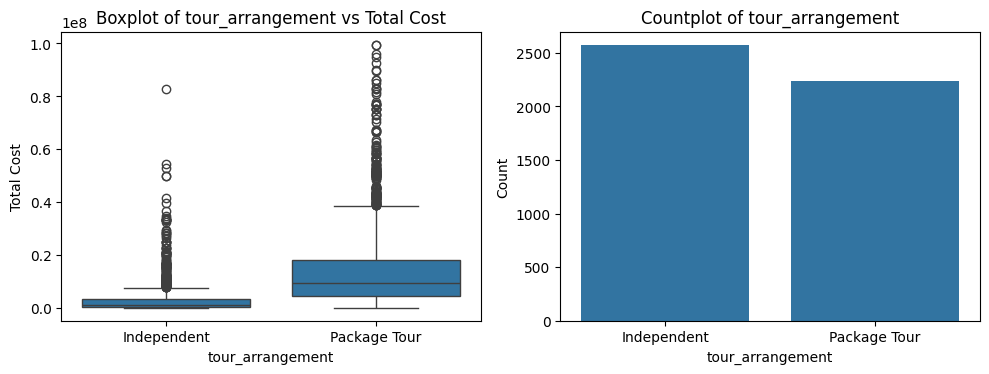

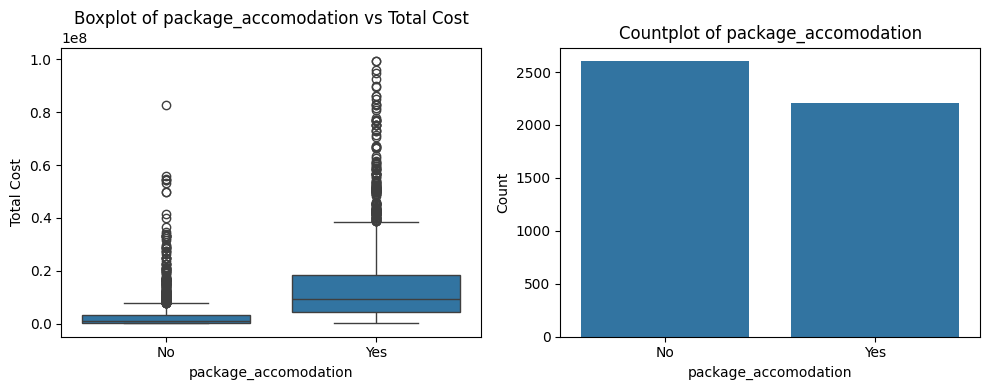

In [11]:
# Box plot of two cardinal feature

import matplotlib.pyplot as plt
import seaborn as sns

for col in cardinality_2:
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))  # Adjust figure size
    sns.boxplot(x=col, y="total_cost", data=train_df, ax=ax[0])
    ax[0].set_title(f'Boxplot of {col} vs Total Cost')
    ax[0].set_xlabel(col)
    ax[0].set_ylabel('Total Cost')

    sns.countplot(x=col, data=train_df, ax=ax[1])
    ax[1].set_title(f'Countplot of {col}')
    ax[1].set_xlabel(col)
    ax[1].set_ylabel('Count')

    plt.tight_layout()  # Adjust layout
    plt.show()


# Countries Data values

In [12]:
counties_name_unique = train_df["country"].unique()

# countries_unique_names = train_df["country"].unique().sort()
# countries_unique_names
counties_name_sorted = sorted(counties_name_unique)
counties_name_sorted

['ALGERIA',
 'ANGOLA',
 'ARGENTINA',
 'AUSTRALIA',
 'AUSTRIA',
 'BELGIUM',
 'BERMUDA',
 'BRAZIL',
 'BURGARIA',
 'BURUNDI',
 'CANADA',
 'CAPE VERDE',
 'CHILE',
 'CHINA',
 'COLOMBIA',
 'COMORO',
 'CONGO',
 'COSTARICA',
 'CROATIA',
 'CYPRUS',
 'CZECH REPUBLIC',
 'DENMARK',
 'DJIBOUT',
 'DOMINICA',
 'DRC',
 'EGYPT',
 'ESTONIA',
 'ETHIOPIA',
 'FINLAND',
 'FRANCE',
 'GEORGIA',
 'GERMANY',
 'GHANA',
 'GREECE',
 'HUNGARY',
 'INDIA',
 'INDONESIA',
 'IRAN',
 'IRAQ',
 'IRELAND',
 'ISRAEL',
 'ITALY',
 'IVORY COAST',
 'JAPAN',
 'KENYA',
 'KOREA',
 'KUWAIT',
 'LATVIA',
 'LEBANON',
 'LESOTHO',
 'LITHUANIA',
 'LUXEMBOURG',
 'MADAGASCAR',
 'MALAWI',
 'MALAYSIA',
 'MALT',
 'MAURITIUS',
 'MEXICO',
 'MONTENEGRO',
 'MORROCO',
 'MOZAMBIQUE',
 'MYANMAR',
 'NAMIBIA',
 'NEPAL',
 'NETHERLANDS',
 'NEW ZEALAND',
 'NIGER',
 'NIGERIA',
 'NORWAY',
 'OMAN',
 'PAKISTAN',
 'PHILIPINES',
 'POLAND',
 'PORTUGAL',
 'QATAR',
 'ROMANIA',
 'RUSSIA',
 'RWANDA',
 'SCOTLAND',
 'SERBIA',
 'SINGAPORE',
 'SLOVAKIA',
 'SLOVENIA',
 '

In [13]:
# contries name to conversational country name
country_name_mapping = {
    "SWIZERLAND": "SWITZERLAND",
    "UAE": "United Arab Emirates",
    "YEMEN": "YEMEN",
    "CONGO": "Republic of the Congo",
    "BURGARIA": "BULGARIA",
    "DRC": "Democratic Republic of the Congo",
    "KOREA": "South Korea",
    "SWAZILAND": "Eswatini",
    "CZECH REPUBLIC": "Czechia",
    "RUSSIA": "Russia",
    "TURKEY": "Turkiye",
    "TRINIDAD TOBACCO": "Trinidad and Tobago",
    "IRAN": "Iran",
    "SLOVAKIA": "Slovakia",
    "CAPE VERDE": "Cabo Verde",
    "COSTARICA": "Costa Rica",
    "PHILIPINES": "Philippines",
    "IVORY COAST": "Côte d'Ivoire",
    "MORROCO": "Morocco"
}

train_df["country"] = train_df["country"].replace(country_name_mapping)


# More research [Two Cardinality Data values Feature and Package Features]

In [14]:
for col in cardinality_2:
    print(f"{col}: {train_df[col].unique()}")

package_insurance: ['No' 'Yes']
first_trip_tz: ['No' 'Yes']
package_food: ['No' 'Yes']
package_guided_tour: ['No' 'Yes']
package_sightseeing: ['No' 'Yes']
package_transport_tz: ['No' 'Yes']
package_transport_int: ['No' 'Yes']
tour_arrangement: ['Independent' 'Package Tour']
package_accomodation: ['No' 'Yes']


In [15]:
for col in cardinality_2:
    fig = px.box(train_df,
             x=col,
             y="total_cost",
             points="all",
             color=col,
             )
    fig.update_layout(
        title=f"Boxplot of {col} vs Total Cost",
        xaxis_title=col,
        yaxis_title="Total Cost",
    )
    fig.show()

In [16]:
# Filtering Package Features
package_features = [col for col in train_df.columns if col.startswith("package_")]
package_features

['package_transport_int',
 'package_accomodation',
 'package_food',
 'package_transport_tz',
 'package_sightseeing',
 'package_guided_tour',
 'package_insurance']

In [17]:
# Copy train_df
train_df_copy = train_df.copy()

In [18]:
# Replace value of `Yes` by 1 and `No` by 0
train_df_copy[package_features] = train_df_copy[package_features].map(lambda x: 1 if x == "Yes" else 0)

In [19]:
train_df_copy[package_features].head()

,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,1,1,1,1,1,0
4,0,0,0,0,0,0,0


In [20]:
# `Number_of_packages` sum of packages
train_df_copy["Number_of_Packages"] = train_df_copy[package_features].sum(axis=1)

In [21]:
train_df_copy["Number_of_Packages"].value_counts().sort_index()

,count
Number_of_Packages,
0,2545
1,23
2,49
3,241
4,429
5,669
6,496
7,357


<Axes: xlabel='Number_of_Packages'>

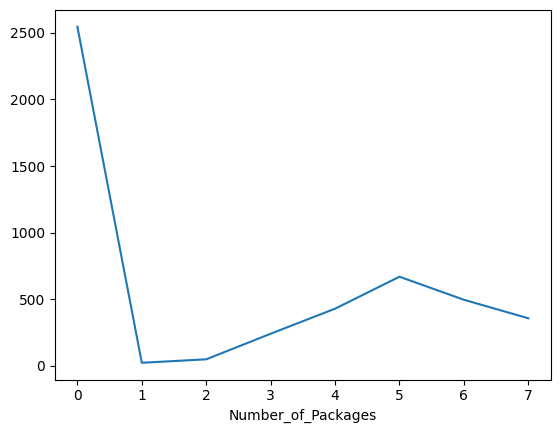

In [22]:
train_df_copy["Number_of_Packages"].value_counts().sort_index().plot()

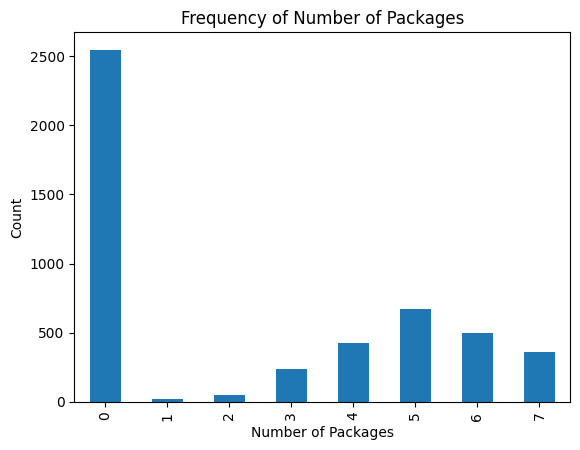

In [23]:
# Frequeny of number of packages in data
train_df_copy["Number_of_Packages"].value_counts().sort_index().plot(kind="bar")
plt.title("Frequency of Number of Packages")
plt.xlabel("Number of Packages")
plt.ylabel("Count")
plt.show()

## Correlational Between Package features with Total Cost [target \vector]

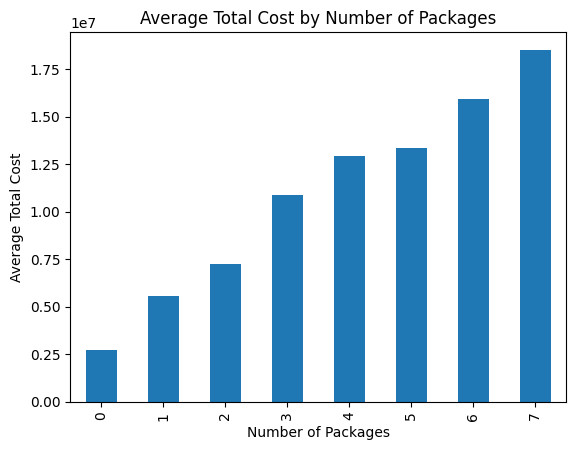

In [24]:
# Distribution plot of numbers packages vs total cost mean by group by number of packages
train_df_copy.groupby("Number_of_Packages")["total_cost"].mean().plot(kind="bar")
plt.title("Average Total Cost by Number of Packages")
plt.xlabel("Number of Packages")
plt.ylabel("Average Total Cost")
plt.show()

In [25]:
result = {}
for col in package_features:
    result[col] = train_df_copy[col].corr(train_df_copy["total_cost"])

package_features_corr = pd.DataFrame(result, index=["Correlation"]).T.sort_values(by="Correlation", ascending=False)
package_features_corr

,Correlation
package_accomodation,0.463381
package_food,0.435454
package_transport_tz,0.434377
package_transport_int,0.428362
package_sightseeing,0.394056
package_guided_tour,0.373092
package_insurance,0.272696


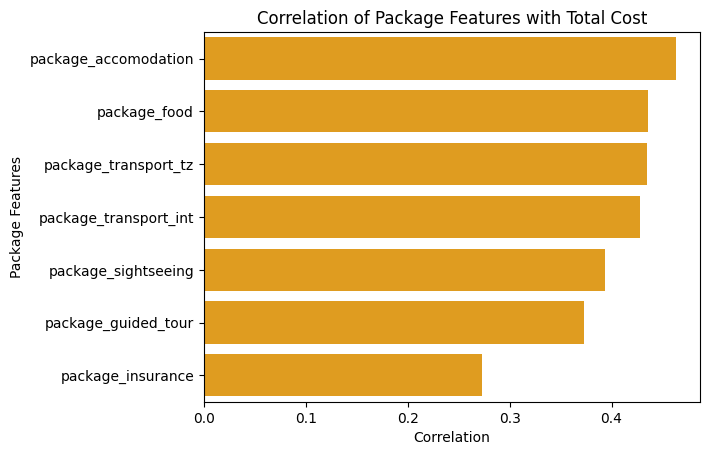

In [26]:
sns.barplot(x=package_features_corr["Correlation"], y=package_features_corr.index, orient="h", color="orange")
plt.title("Correlation of Package Features with Total Cost")
plt.ylabel("Package Features")
plt.xlabel("Correlation")
plt.show()

In [27]:
train_df_copy["Number_of_Packages"].corr(train_df_copy["total_cost"])

0.48969928290391956

 # Age Group

In [28]:
# Age group unique data
train_df_copy["age_group"].unique()

array(['45-64', '25-44', '1-24', '65+'], dtype=object)

In [29]:
train_df_copy["age_group"].value_counts()

,count
age_group,
25-44,2487
45-64,1391
1-24,624
65+,307


In [30]:
age_group = train_df_copy["age_group"].unique()
age_group.sort()


fig = px.box(
    train_df_copy,
    color="Number_of_Packages",
    y="total_cost",
    x="age_group",
    category_orders={
        "Number_of_Packages": range(8),
        "age_group": age_group
                     },  # Specify the order
)

fig.update_layout(
    title="Boxplot of Total Cost by Number of Packages",
    xaxis_title="Age Group",
    yaxis_title="Total Cost",
)

fig.show()

#

In [31]:
# Correlation between Number of packages and total cost

for col in package_features:
    print(f"{col}: {train_df_copy[col].corr(train_df_copy['total_cost'])}")

print(f'Number of packages: {train_df_copy["Number_of_Packages"].corr(train_df_copy["total_cost"])}')

package_transport_int: 0.42836224818040475
package_accomodation: 0.4633805748069376
package_food: 0.4354542498106208
package_transport_tz: 0.43437682162608604
package_sightseeing: 0.39405637128409615
package_guided_tour: 0.3730915671933562
package_insurance: 0.27269614455444874
Number of packages: 0.48969928290391956


# Age Group

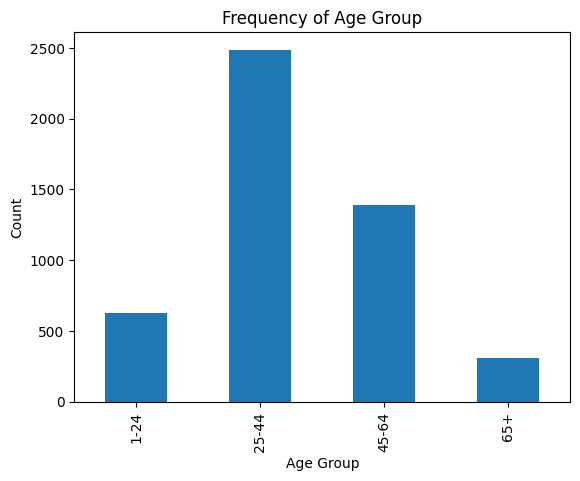

In [32]:
# Barchart plot `age_group`
train_df["age_group"].value_counts().sort_index().plot(kind="bar")
plt.title("Frequency of Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

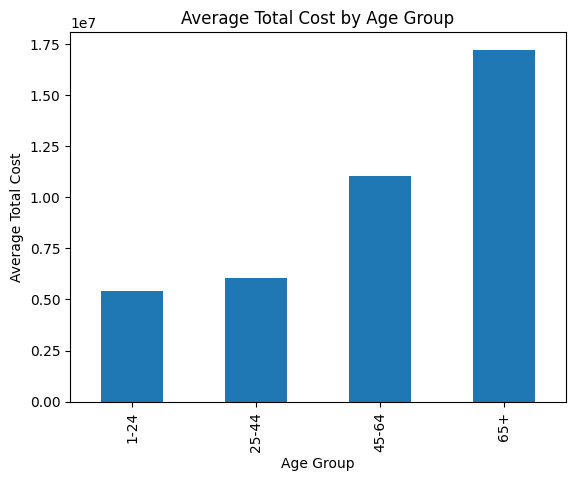

In [33]:
# group by age group and plot mean of total cost
train_df.groupby("age_group")["total_cost"].mean().plot(kind="bar")
plt.title("Average Total Cost by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Total Cost")
plt.show()

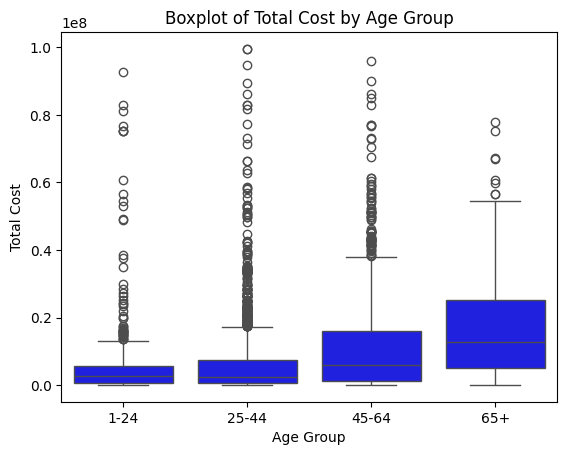

In [34]:
# boxplot on the age group

sns.boxplot(x="age_group", y="total_cost", data=train_df_copy.sort_values(by="age_group"), color="b")
plt.title("Boxplot of Total Cost by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Cost")
plt.show()

# Country vs Total cost


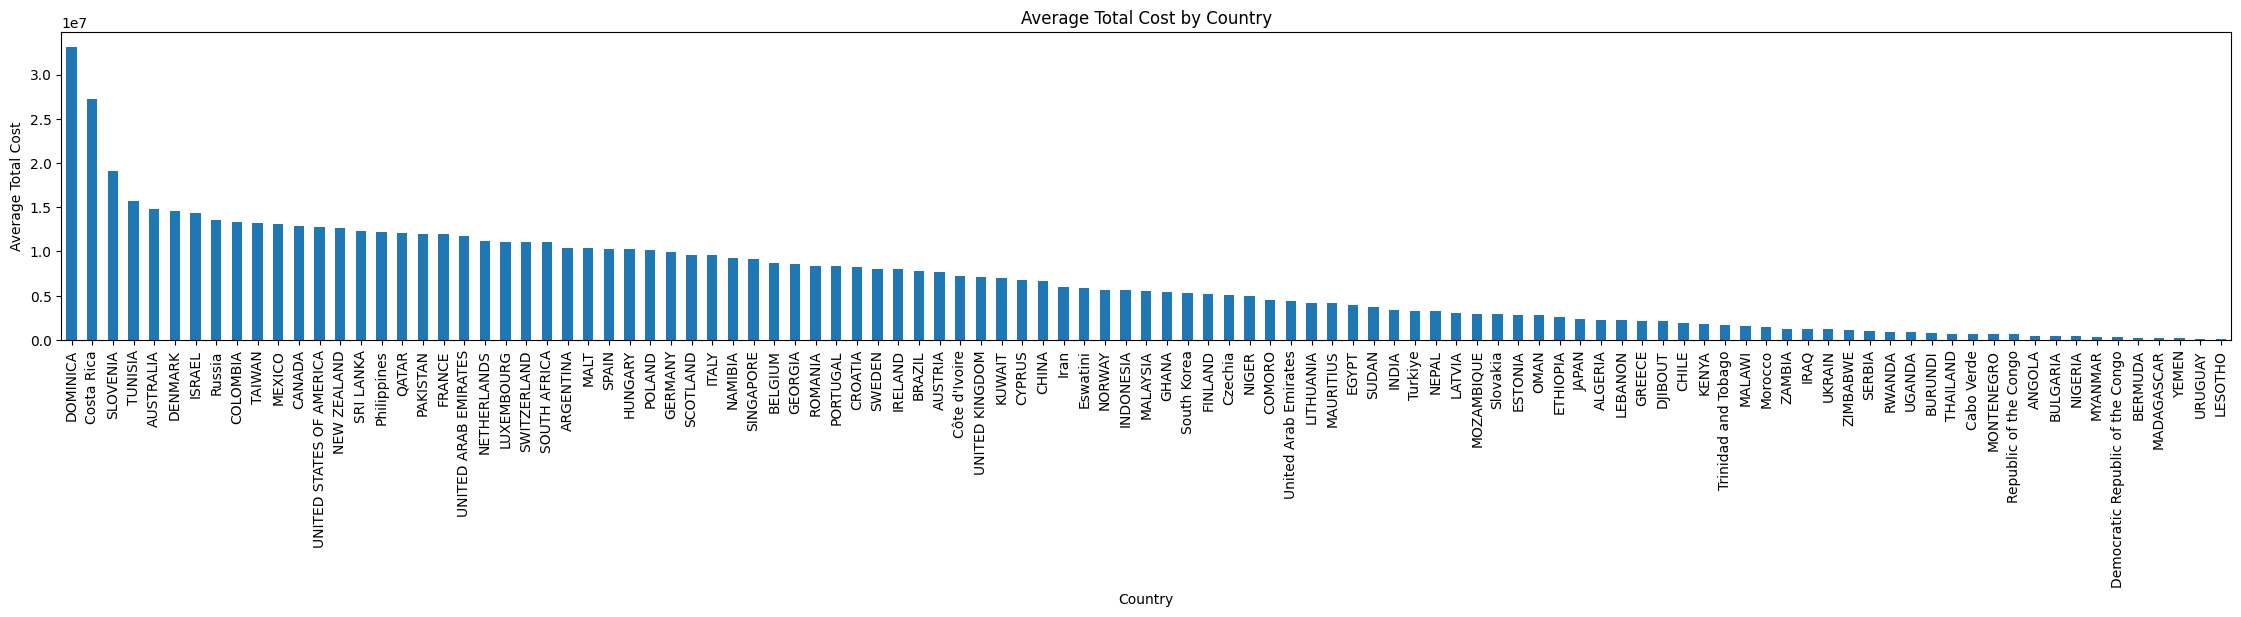

In [35]:
fig = plt.subplots(1, figsize=(28, 4))

train_df.groupby("country")["total_cost"].mean().sort_values(ascending=False).plot(kind="bar")
plt.title("Average Total Cost by Country")
plt.xlabel("Country")
plt.ylabel("Average Total Cost")
plt.show()

# Categorize countries based on their economic level

In [36]:
category_A_countries = set()
category_B_countries = set()
category_C_countries = set()

category_countries = [
    "Category A: High income.txt",
    "Category B: Upper middle income.txt",
    "Category C: Low and lower middle income.txt",
]

for category in category_countries:
    with open(FILE_PATH + category, "r") as f:
        for line in f:
            country = line.strip()
            if country != "Unknown":
                if category == "Category A: High income.txt":
                    category_A_countries.add(country)
                elif category == "Category B: Upper middle income.txt":
                    category_B_countries.add(country)
                elif category == "Category C: Low and lower middle income.txt":
                    category_C_countries.add(country)

In [37]:
print(f"Category A countries: {len(category_A_countries)}")
print(f"Category B countries: {len(category_B_countries)}")
print(f"Category C countries: {len(category_C_countries)}")

Category A countries: 72
Category B countries: 49
Category C countries: 69


In [38]:
! pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 73.5 MB/s eta 0:00:00


In [39]:
import pycountry

def country_to_iso3(country_name):
    try:
        country = pycountry.countries.search_fuzzy(country_name)[0]
        return country.alpha_3
    except LookupError:
        return "Unknown"


train_df['iso3'] = train_df_copy['country'].apply(country_to_iso3)


In [40]:
# based which caterogy country exist group them

def categorize_country(country):
    if country in category_A_countries:
        return "Category A"
    elif country in category_B_countries:
        return "Category B"
    elif country in category_C_countries:
        return "Category C"
    else:
        return "Unknown"

train_df_copy["country_category"] = train_df["iso3"].apply(categorize_country)

In [41]:
train_df_copy["country_category"].value_counts()

,count
country_category,
Category A,3226
Category C,1137
Category B,368
Unknown,78


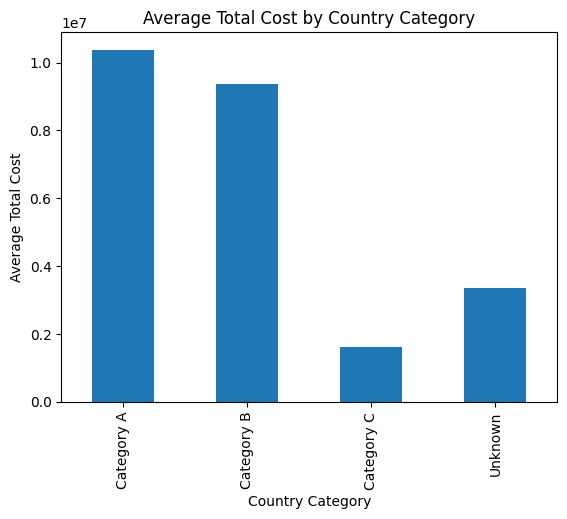

In [42]:
train_df_copy.groupby("country_category")["total_cost"].mean().plot(kind="bar")
plt.title("Average Total Cost by Country Category")
plt.xlabel("Country Category")
plt.ylabel("Average Total Cost")
plt.show()

In [43]:
# distribution total cost vs country category
fig = px.box(train_df_copy,
             x="country_category",
             y="total_cost",
             color="Number_of_Packages",
             category_orders={
                 "Number_of_Packages": range(8),
                 "country_category": ["Category A", "Category B", "Category C", "Unknown"]
             },

             )
fig.update_layout(
    title="Boxplot of Total Cost by Country Category",
    xaxis_title="Country Category",
    yaxis_title="Total Cost",
)
fig.show()

# Total People Vs Total Price

In [44]:
# total people
# Total_total = Males + Females
train_df_copy["total_people"] = train_df_copy["total_male"] + train_df_copy["total_female"]


In [45]:
train_df_copy["total_people"].head()

,total_people
0,2.0
1,1.0
2,1.0
3,2.0
4,1.0


In [46]:
print("Total price vs [Total package] =", (train_df_copy["total_people"] * train_df_copy["Number_of_Packages"]).corr(train_df_copy["total_cost"]))

Total price vs [Total package] = 0.5127594042295345


In [47]:
# `total_package_per_trips` form `total_people` and `Number_of_Package`

train_df_copy["total_package_per_trips"] = train_df_copy["Number_of_Packages"] * train_df_copy["total_people"]

train_df_copy["total_package_per_trips"].corr(train_df_copy["total_cost"])

0.5127594042295345

# Total Day Vs Total cost

## missing values

In [48]:
missed_df = train_df_copy.isnull().sum()

In [49]:
missed_features = missed_df[missed_df > 0].index
missed_features

Index(['travel_with', 'total_female', 'total_male', 'most_impressing',
       'total_people', 'total_package_per_trips'],
      dtype='object')

In [50]:
for col in missed_features:
    if train_df_copy[col].dtype == "object":
        train_df_copy[col].fillna(train_df_copy[col].mode()[0], inplace=True)
    else:
        train_df_copy[col].fillna(train_df_copy[col].mean(), inplace=True)

In [51]:
train_df_copy["total_day"] = train_df_copy['night_mainland'] + train_df_copy['night_zanzibar']

In [52]:
train_df_copy.isnull().sum()

,0
ID,0
country,0
age_group,0
travel_with,0
total_female,0
total_male,0
purpose,0
main_activity,0
info_source,0
tour_arrangement,0


In [53]:
train_df_copy["total_day"].corr(train_df_copy["total_cost"])

0.07672312644195618

In [54]:
(train_df_copy["total_day"] * train_df_copy["total_people"]).corr(train_df_copy["total_cost"])


0.22236839558730873

* Total Day has not strong correleation

In [55]:
train_df_copy[package_features] = train_df_copy[package_features].multiply(train_df_copy["total_people"], axis=0)

In [56]:
for col in package_features:
    print(f"{col}: {train_df_copy[col].corr(train_df_copy['total_cost'])}")

package_transport_int: 0.4519953301783455
package_accomodation: 0.49789264065756716
package_food: 0.4715021636192321
package_transport_tz: 0.4690049810731868
package_sightseeing: 0.42690034444220715
package_guided_tour: 0.4067214440009327
package_insurance: 0.28332978007408677


In [57]:
train_df_copy[package_features].tail()

,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance
4804,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4805,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4806,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4807,2.0,2.0,2.0,0.0,0.0,0.0,0.0
4808,2.0,2.0,2.0,2.0,2.0,2.0,0.0


In [58]:
train_df_copy["total_package_cost"] = train_df_copy[package_features].sum(axis=1)

In [59]:
train_df_copy["total_package_cost"].corr(train_df_copy["total_cost"])

0.5104706199436123

In [60]:
train_df_copy["total_people"].describe()

,total_people
count,4809.000000
mean,1.932306
std,2.072270
min,0.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,93.000000


In [61]:
# drop rows with total people is Zero
train_df_copy = train_df_copy[train_df_copy["total_people"] != 0]

In [62]:
train_df_copy["total_cost_per_person"] = train_df_copy["total_cost"] / train_df_copy["total_people"]

In [63]:
train_df_copy[["total_cost", "total_cost_per_person"]]

,total_cost,total_cost_per_person
0,674602.5,337301.25
1,3214906.5,3214906.50
2,3315000.0,3315000.00
3,7790250.0,3895125.00
4,1657500.0,1657500.00
...,...,...
4804,3315000.0,3315000.00
4805,10690875.0,5345437.50
4806,2246636.7,2246636.70
4807,1160250.0,580125.00


In [64]:
train_df_copy["total_cost_per_person"].describe()

,total_cost_per_person
count,4.794000e+03
mean,4.237411e+06
std,6.354041e+06
min,6.111111e+03
25%,5.673325e+05
50%,2.198800e+06
75%,5.433975e+06
max,9.008512e+07


Text(0, 0.5, 'Total Cost Per Person')

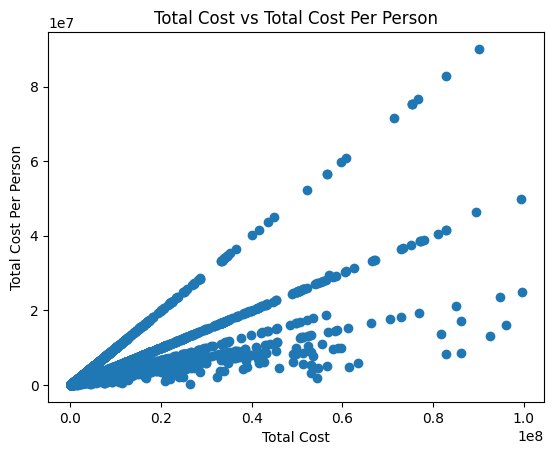

In [65]:
# scatter plot between total cost and total cost per person
plt.scatter(train_df_copy["total_cost"], train_df_copy["total_cost_per_person"])
plt.title("Total Cost vs Total Cost Per Person")
plt.xlabel("Total Cost")
plt.ylabel("Total Cost Per Person")

In [66]:
train_df_copy["Number_of_Packages"] += 1

In [67]:
train_df_copy["Number_of_Packages"].describe()

,Number_of_Packages
count,4794.000000
mean,3.363788
std,2.674713
min,1.000000
25%,1.000000
50%,1.000000
75%,6.000000
max,8.000000


In [68]:
train_df_copy["total_cost_per_person_per_package"] = train_df_copy["total_cost_per_person"] / train_df_copy["Number_of_Packages"]

In [69]:
train_df_copy["total_cost_per_person_per_package"].describe()

,total_cost_per_person_per_package
count,4.794000e+03
mean,1.474141e+06
std,2.384685e+06
min,1.093750e+03
25%,3.812250e+05
50%,8.536125e+05
75%,1.657500e+06
max,8.287500e+07


# Based on Economic Level of countries

In [70]:
# divide based economy level country
category_A_countries_df = train_df_copy[train_df_copy["country_category"] == "Category A"]
category_B_countries_df = train_df_copy[train_df_copy["country_category"] == "Category B"]
category_C_countries_df = train_df_copy[train_df_copy["country_category"] == "Category C"]
category_unknown_countries_df = train_df_copy[train_df_copy["country_category"] == "Unknown"]

In [71]:
category_A_countries_df["total_package_cost"].corr(category_A_countries_df["total_cost"])

0.49131075505188393

In [72]:
category_B_countries_df["total_package_cost"].corr(category_B_countries_df["total_cost"])

0.3025532170303777

In [73]:
category_C_countries_df["total_package_cost"].corr(category_C_countries_df["total_cost"])

0.42126122277722183

In [74]:
category_unknown_countries_df["total_package_cost"].corr(category_unknown_countries_df["total_cost"])

0.35482649789765325

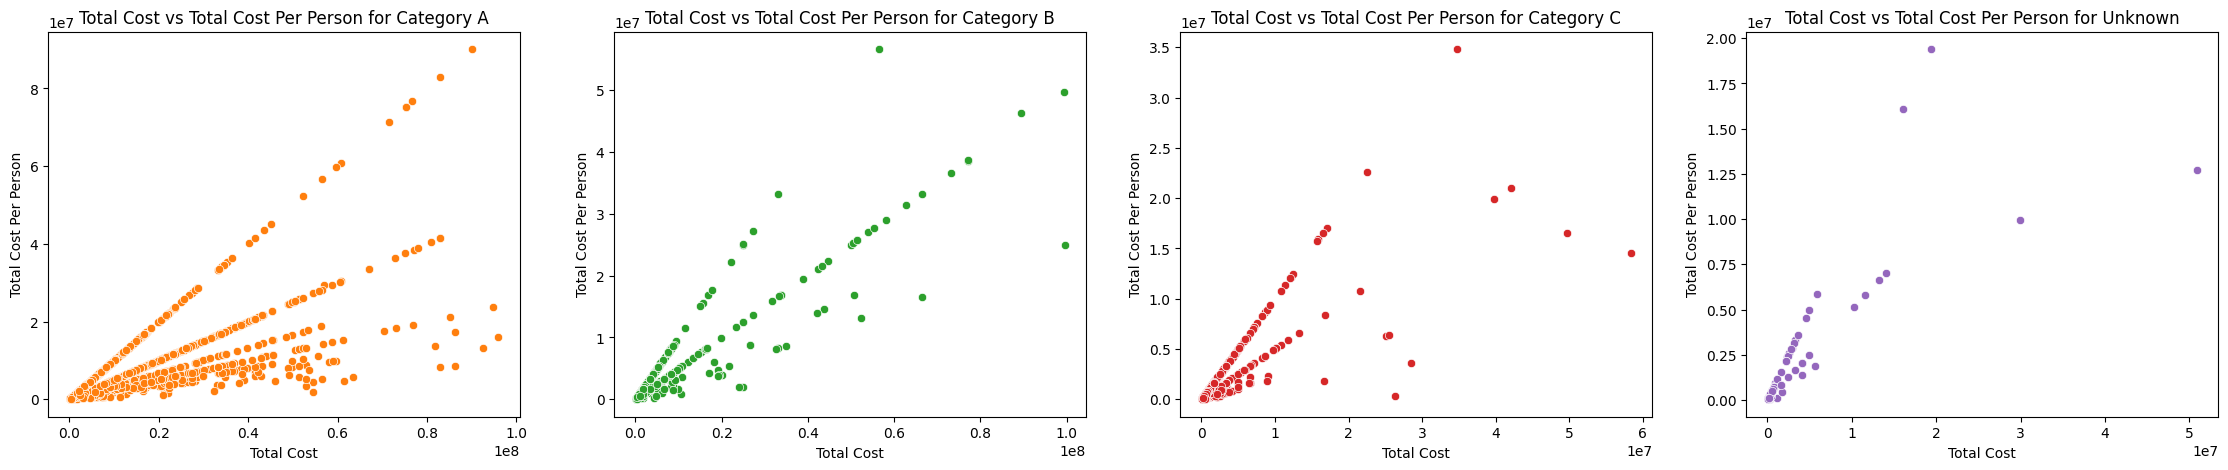

In [75]:
# scatter plot between total cost and total cost per person for every categorical
fig = plt.subplots(1, 4, figsize=(28, 5))

for i, df in enumerate([category_A_countries_df, category_B_countries_df, category_C_countries_df, category_unknown_countries_df]):
    sns.scatterplot(x="total_cost", y="total_cost_per_person", data=df, ax=fig[1][i], color=f"C{i+1}")
    fig[1][i].set_title(f"Total Cost vs Total Cost Per Person for {df['country_category'].iloc[0]}")
    fig[1][i].set_xlabel("Total Cost")
    fig[1][i].set_ylabel("Total Cost Per Person")

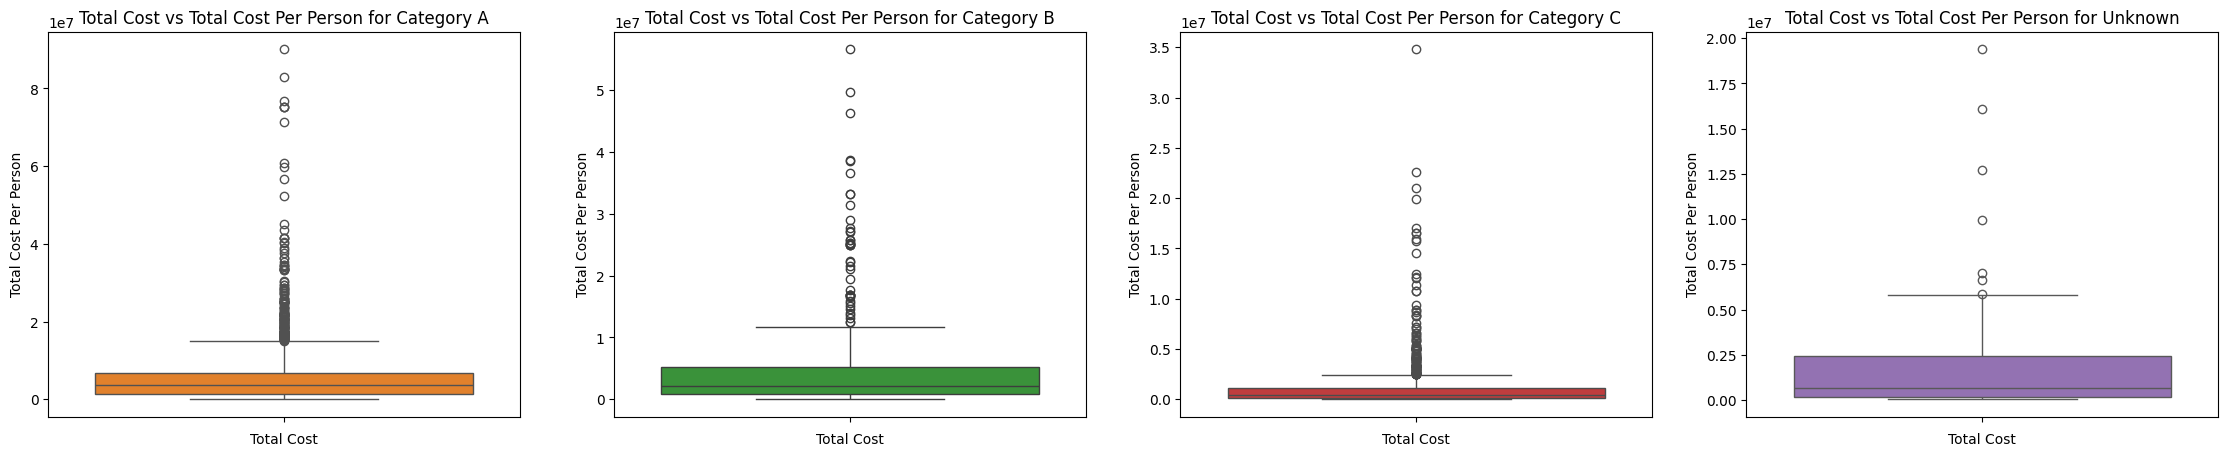

In [76]:
# box plot between total cost per person for every categorical
fig = plt.subplots(1, 4, figsize=(28, 5))
for i, df in enumerate([category_A_countries_df, category_B_countries_df, category_C_countries_df, category_unknown_countries_df]):
    sns.boxplot(y="total_cost_per_person", data=df, ax=fig[1][i], color=f"C{i+1}")
    fig[1][i].set_title(f"Total Cost vs Total Cost Per Person for {df['country_category'].iloc[0]}")
    fig[1][i].set_xlabel("Total Cost")
    fig[1][i].set_ylabel("Total Cost Per Person")


In [77]:
"country" in category_unknown_countries_df.columns

True

In [78]:
category_unknown_countries_df["country"].unique()

array(['YEMEN', 'Republic of the Congo',
       'Democratic Republic of the Congo', 'South Korea', 'Czechia',
       'Russia', 'Iran', 'Slovakia'], dtype=object)

In [79]:
# box plot between total cost per person for every categorical base total coast of package

for i, df in enumerate([category_A_countries_df, category_B_countries_df, category_C_countries_df, category_unknown_countries_df]):
    fig = px.box(
        df,
        y="total_cost_per_person",
        points="all",
        color="Number_of_Packages"
    )
    fig.update_layout(
        title=f"Boxplot of Total Cost Per Person by Total Package Cost for {df['country_category'].iloc[0]}",
        xaxis_title="Total Package Cost",
        yaxis_title="Total Cost Per Person",
    )
    fig.show()

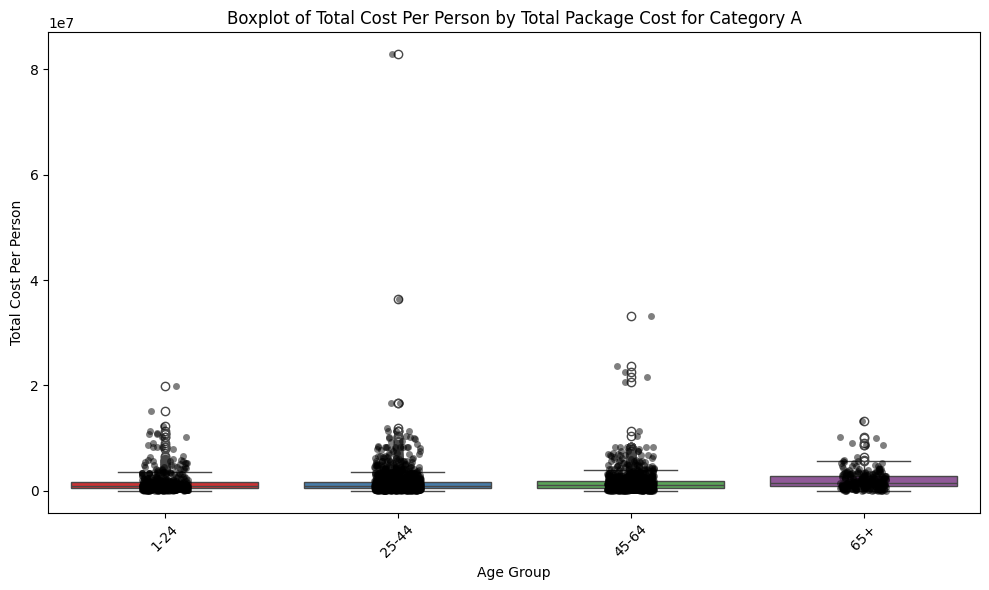

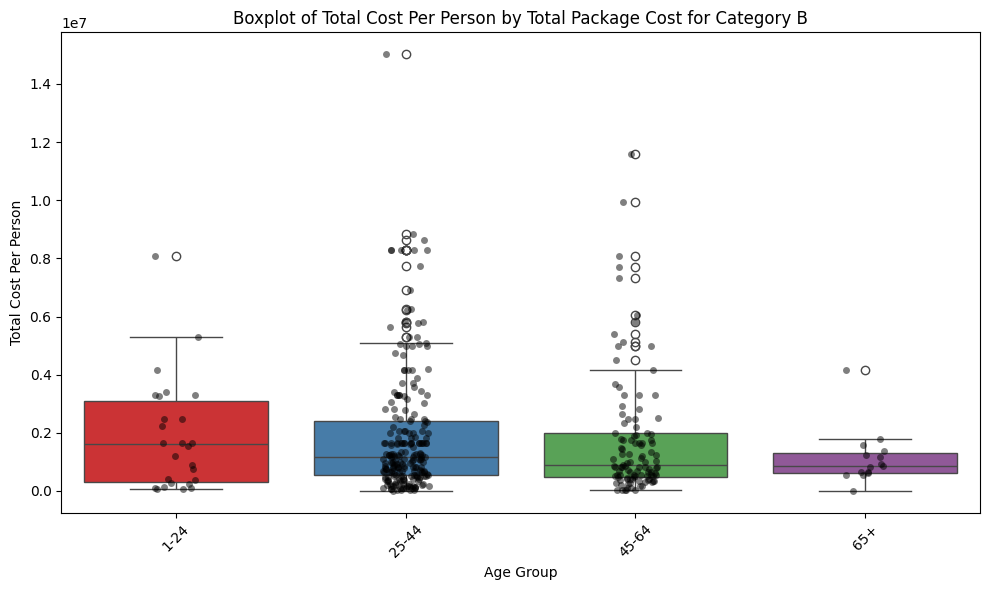

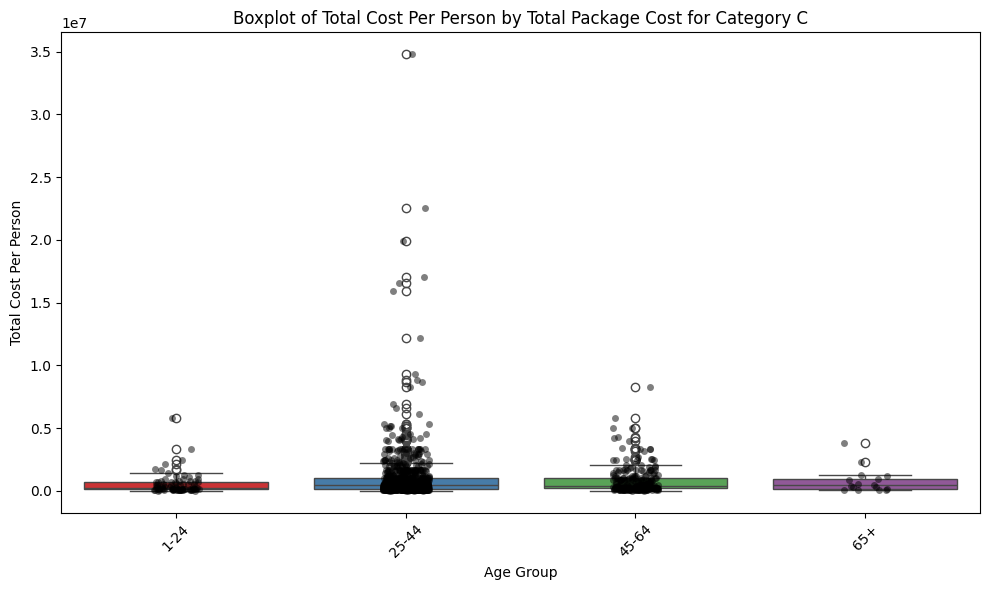

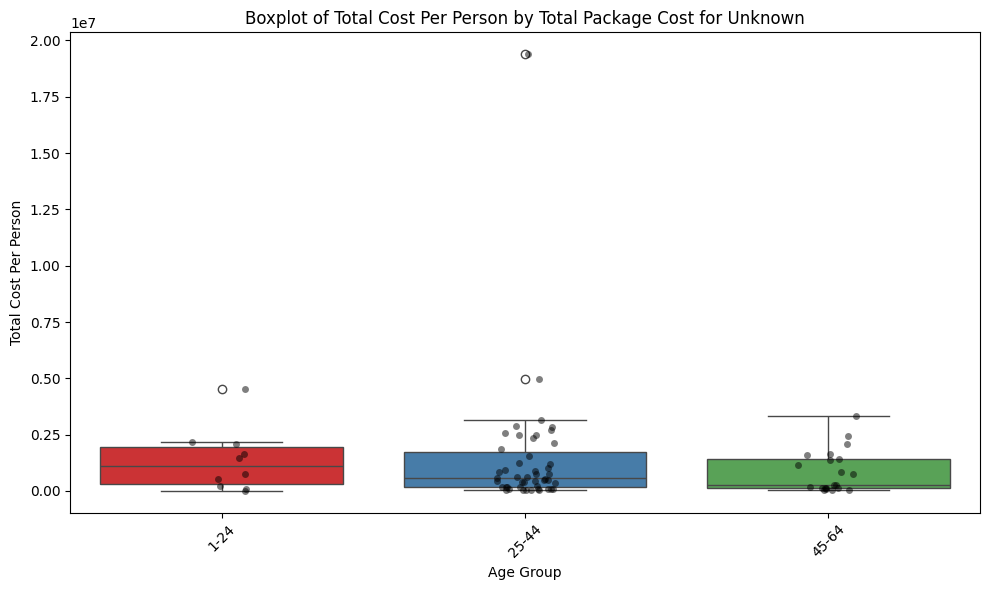

In [80]:

# List of dataframes
dataframes = [
    category_A_countries_df,
    category_B_countries_df,
    category_C_countries_df,
    category_unknown_countries_df
]

# Iterate through the dataframes
for i, df in enumerate(dataframes):
    df = df.sort_values(by="age_group")

    plt.figure(figsize=(10, 6))

    sns.boxplot(
        data=df,
        x="age_group",
        y="total_cost_per_person_per_package",
        palette="Set1"
    )

    sns.stripplot(
        data=df,
        x="age_group",
        y="total_cost_per_person_per_package",
        color="black",
        alpha=0.5,
        jitter=True
    )


    plt.title(f"Boxplot of Total Cost Per Person by Total Package Cost for {df['country_category'].iloc[0]}")
    plt.xlabel("Age Group")
    plt.ylabel("Total Cost Per Person")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()

    # Show the plot
    plt.show()


In [81]:
# quantile q10 and q90
category_A_countries_df["total_cost_per_person_per_package"].describe()


,total_cost_per_person_per_package
count,3.213000e+03
mean,1.632381e+06
std,2.526080e+06
min,1.093750e+03
25%,5.552625e+05
50%,1.011075e+06
75%,1.884025e+06
max,8.287500e+07


In [82]:
# q10, q90 for all categories dataset
for df in [category_A_countries_df, category_B_countries_df, category_C_countries_df, category_unknown_countries_df]:
    print(df["total_cost_per_person_per_package"].describe())

count    3.213000e+03
mean     1.632381e+06
std      2.526080e+06
min      1.093750e+03
25%      5.552625e+05
50%      1.011075e+06
75%      1.884025e+06
max      8.287500e+07
Name: total_cost_per_person_per_package, dtype: float64
count    3.680000e+02
mean     1.831790e+06
std      2.092697e+06
min      6.400000e+03
25%      5.000000e+05
50%      1.094068e+06
75%      2.279743e+06
max      1.502596e+07
Name: total_cost_per_person_per_package, dtype: float64
count    1.135000e+03
mean     9.255837e+05
std      1.936817e+06
min      5.330000e+03
25%      1.657500e+05
50%      4.143750e+05
75%      9.945000e+05
max      3.480750e+07
Name: total_cost_per_person_per_package, dtype: float64
count    7.800000e+01
mean     1.250723e+06
std      2.352980e+06
min      1.275000e+04
25%      1.421156e+05
50%      5.816125e+05
75%      1.640666e+06
max      1.939275e+07
Name: total_cost_per_person_per_package, dtype: float64


In [83]:
filtered_datasets = []

for df  in dataframes:
    q10, q90 = df["total_cost_per_person_per_package"].quantile([0.1, 0.9])
    df = df[(df["total_cost_per_person_per_package"] >= q10) & (df["total_cost_per_person_per_package"] <= q90)]
    filtered_datasets.append(df)


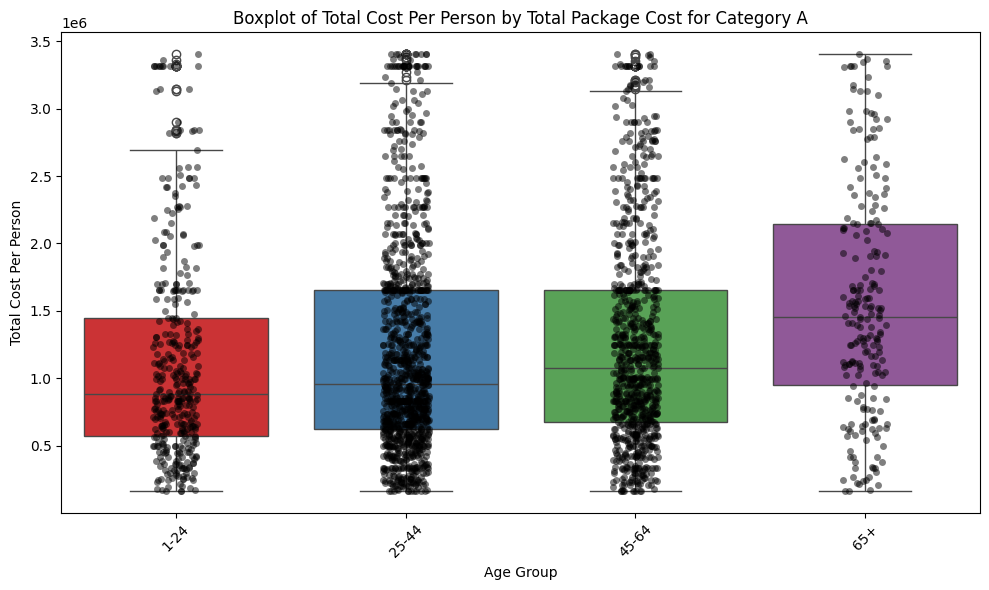

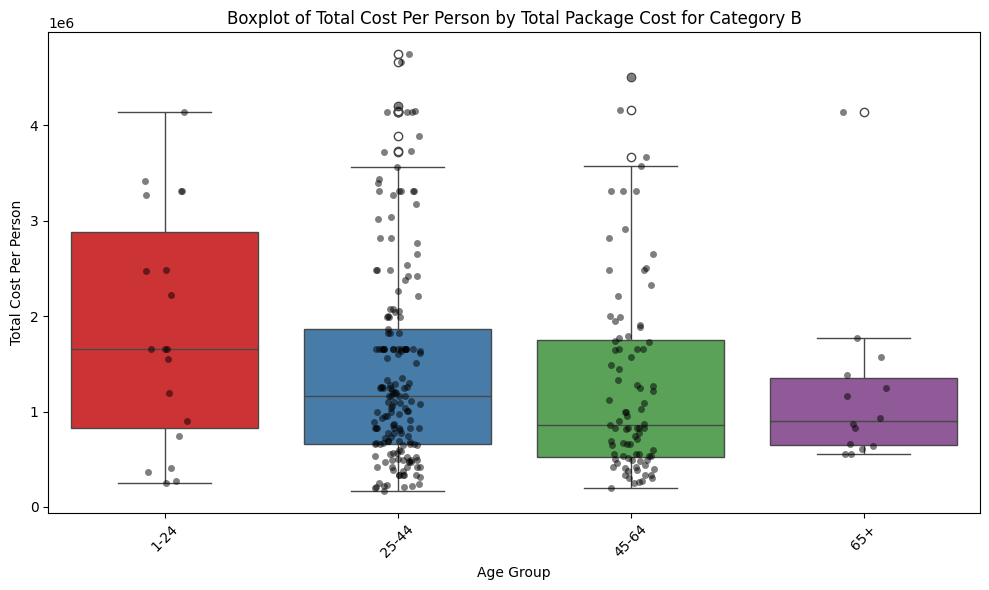

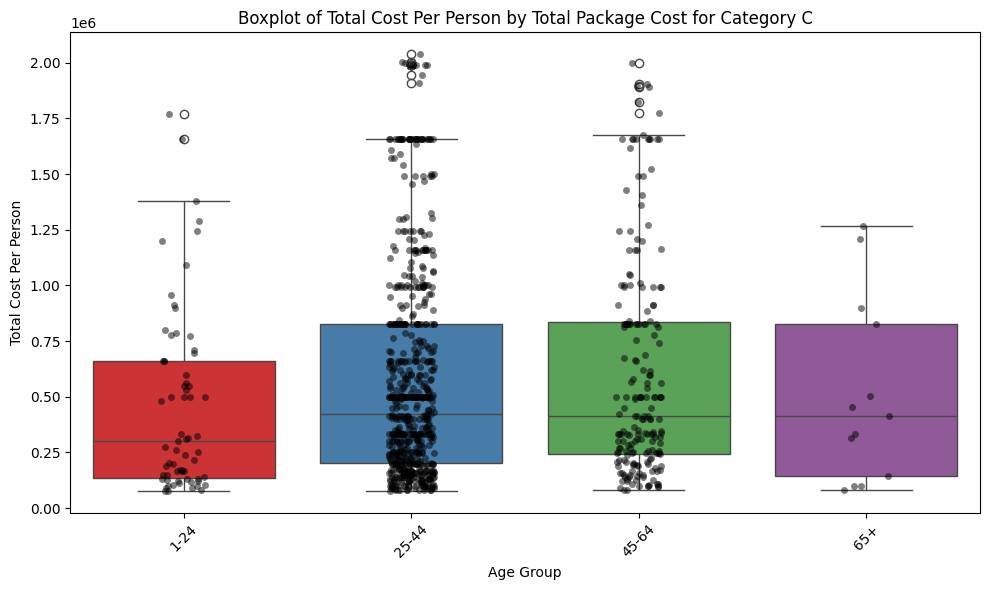

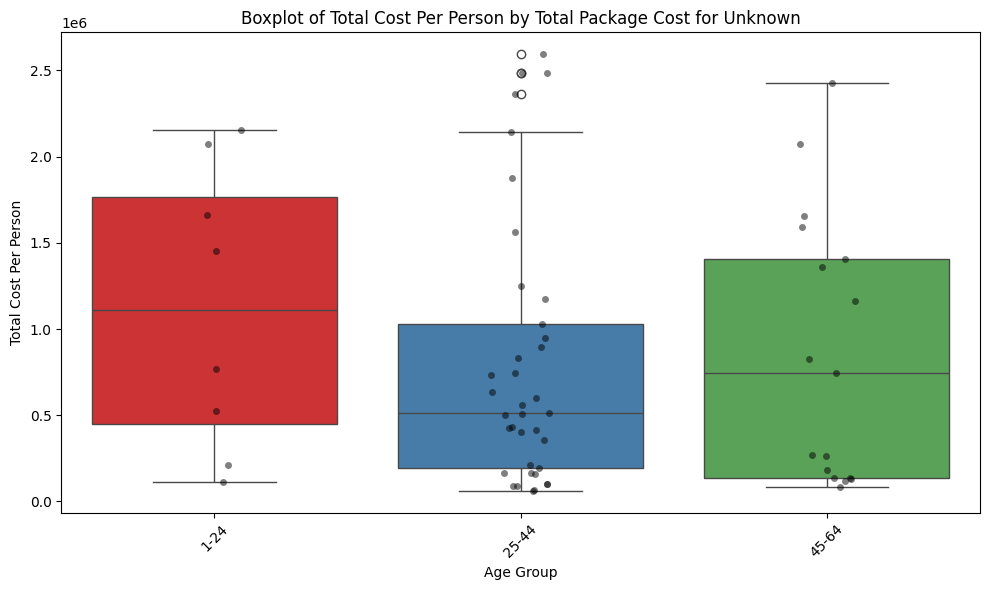

In [84]:
for i, df in enumerate(filtered_datasets):
    df = df.sort_values(by="age_group")

    plt.figure(figsize=(10, 6))

    sns.boxplot(
        data=df,
        x="age_group",
        y="total_cost_per_person_per_package",
        palette="Set1"
    )

    sns.stripplot(
        data=df,
        x="age_group",
        y="total_cost_per_person_per_package",
        color="black",
        alpha=0.5,
        jitter=True
    )


    plt.title(f"Boxplot of Total Cost Per Person by Total Package Cost for {df['country_category'].iloc[0]}")
    plt.xlabel("Age Group")
    plt.ylabel("Total Cost Per Person")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()

    # Show the plot
    plt.show()


In [85]:
# merge the filtered datasets
merged_df = pd.concat(filtered_datasets, ignore_index=True, axis=0)

In [86]:
merged_df.shape

(3846, 31)

In [87]:
merged_df.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,most_impressing,total_cost,Number_of_Packages,country_category,total_people,total_package_per_trips,total_day,total_package_cost,total_cost_per_person,total_cost_per_person_per_package
0,tour_0,SWITZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,Friendly People,674602.5,1,Category A,2.0,0.0,13.0,0.0,337301.25,337301.250
1,tour_10,UNITED KINGDOM,25-44,Alone,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,"Wonderful Country, Landscape, Nature",3214906.5,1,Category A,1.0,0.0,21.0,0.0,3214906.50,3214906.500
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,Excellent Experience,3315000.0,1,Category A,1.0,0.0,32.0,0.0,3315000.00,3315000.000
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Friendly People,7790250.0,6,Category A,2.0,10.0,11.0,10.0,3895125.00,649187.500
4,tour_1008,UNITED STATES OF AMERICA,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Friendly People,3480750.0,8,Category A,2.0,14.0,13.0,14.0,1740375.00,217546.875


In [88]:
merged_df.columns

Index(['ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'payment_mode', 'first_trip_tz', 'most_impressing',
       'total_cost', 'Number_of_Packages', 'country_category', 'total_people',
       'total_package_per_trips', 'total_day', 'total_package_cost',
       'total_cost_per_person', 'total_cost_per_person_per_package'],
      dtype='object')

In [89]:
dropped_feature = ['total_package_cost',
       'total_cost_per_person', 'total_cost_per_person_per_package']

# `travel_with` vs `total_cost`

In [90]:
merged_df["travel_with"].value_counts()

,count
travel_with,
Alone,1906
Spouse,810
Friends/Relatives,689
Spouse and Children,307
Children,134


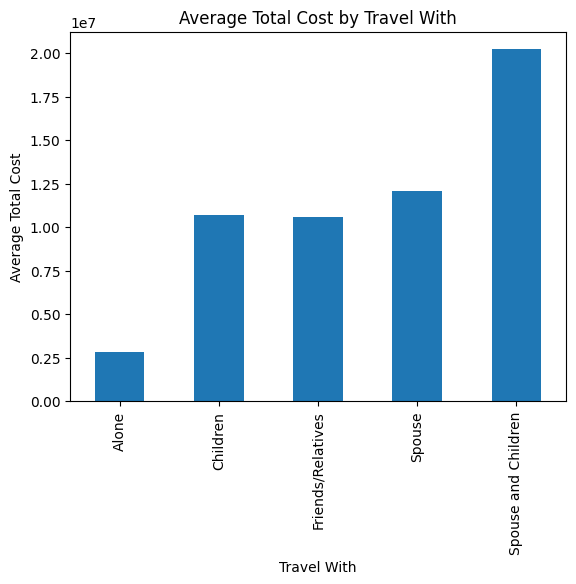

In [91]:
merged_df.groupby("travel_with")["total_cost"].mean().plot(kind="bar")
plt.title("Average Total Cost by Travel With")
plt.xlabel("Travel With")
plt.ylabel("Average Total Cost")
plt.show()

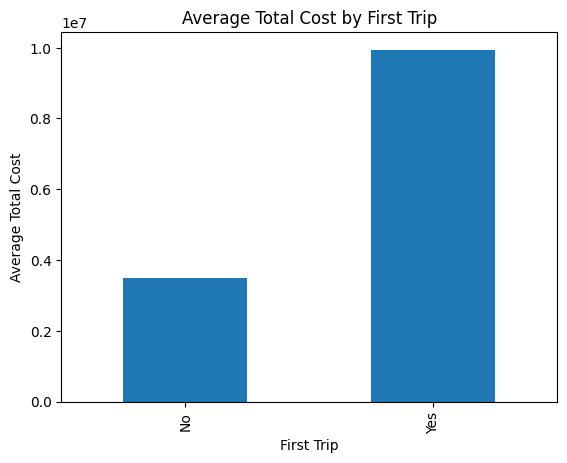

In [92]:
# first trip vs total cost
merged_df.groupby("first_trip_tz")["total_cost"].mean().plot(kind="bar")
plt.title("Average Total Cost by First Trip")
plt.xlabel("First Trip")
plt.ylabel("Average Total Cost")
plt.show()

In [93]:
label_encoded_features = ["first_trip_tz"]

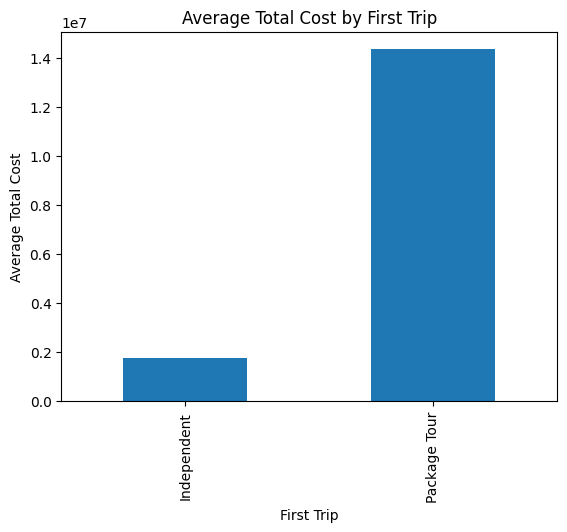

In [94]:
# tour_arrangement vs total cost
merged_df.groupby("tour_arrangement")["total_cost"].mean().plot(kind="bar")
plt.title("Average Total Cost by First Trip")
plt.xlabel("First Trip")
plt.ylabel("Average Total Cost")
plt.show()

In [95]:
label_encoded_features.append("tour_arrangement")

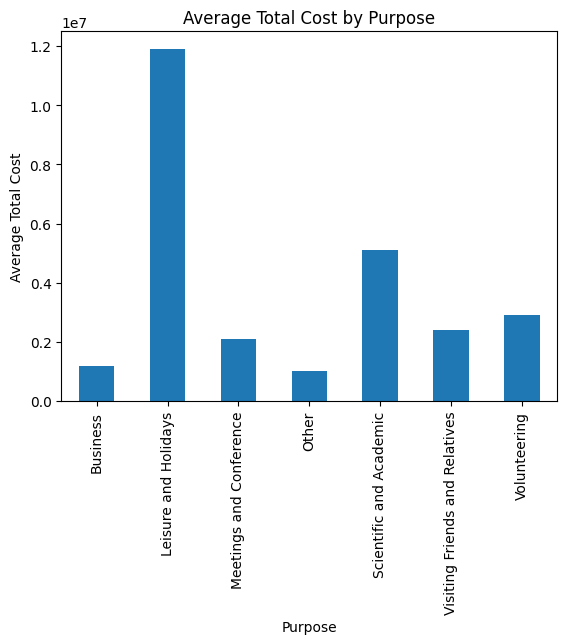

In [96]:
# purpose vs total_cost [boxplot]
merged_df.groupby("purpose")["total_cost"].mean().plot(kind="bar")
plt.title("Average Total Cost by Purpose")
plt.xlabel("Purpose")
plt.ylabel("Average Total Cost")
plt.show()

In [97]:
merged_df["purpose"].unique()

array(['Leisure and Holidays', 'Visiting Friends and Relatives',
       'Volunteering', 'Business', 'Meetings and Conference', 'Other',
       'Scientific and Academic'], dtype=object)

In [98]:
map_purpose = {
    "Leisure and Holidays": 3,
    "Visiting Friends and Relatives": 2,
    "Business": 1,
    "Volunteering": 2,
    "Other": 1,
    "Meetings and Conference" : 1,
    "Scientific and Academic": 2
}

merged_df["purpose"].replace(map_purpose, inplace = True)


In [99]:
merged_df["purpose"].unique()


array([3, 2, 1])

In [100]:
dropped_feature.extend(['total_female',
       'total_male',  'main_activity', 'info_source','payment_mode'])

In [101]:
# drop dropped_feature
merged_df.drop(dropped_feature, axis=1, inplace=True)

In [102]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3846 entries, 0 to 3845
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       3846 non-null   object 
 1   country                  3846 non-null   object 
 2   age_group                3846 non-null   object 
 3   travel_with              3846 non-null   object 
 4   purpose                  3846 non-null   int64  
 5   tour_arrangement         3846 non-null   object 
 6   package_transport_int    3846 non-null   float64
 7   package_accomodation     3846 non-null   float64
 8   package_food             3846 non-null   float64
 9   package_transport_tz     3846 non-null   float64
 10  package_sightseeing      3846 non-null   float64
 11  package_guided_tour      3846 non-null   float64
 12  package_insurance        3846 non-null   float64
 13  night_mainland           3846 non-null   float64
 14  night_zanzibar          

In [103]:
dropped_feature = ["night_mainland", "night_zanzibar", "most_impressing", "total_package_per_trips", "total_package_per_trips", "country"]

In [104]:
# drop dropped_feature
merged_df.drop(dropped_feature, axis=1, inplace=True)

In [105]:
label_encoded_features.extend(["country_category", "age_group", ])

In [106]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3846 entries, 0 to 3845
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3846 non-null   object 
 1   age_group              3846 non-null   object 
 2   travel_with            3846 non-null   object 
 3   purpose                3846 non-null   int64  
 4   tour_arrangement       3846 non-null   object 
 5   package_transport_int  3846 non-null   float64
 6   package_accomodation   3846 non-null   float64
 7   package_food           3846 non-null   float64
 8   package_transport_tz   3846 non-null   float64
 9   package_sightseeing    3846 non-null   float64
 10  package_guided_tour    3846 non-null   float64
 11  package_insurance      3846 non-null   float64
 12  first_trip_tz          3846 non-null   object 
 13  total_cost             3846 non-null   float64
 14  Number_of_Packages     3846 non-null   int64  
 15  coun

In [107]:
merged_df.drop("ID", axis=1, inplace=True)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3846 entries, 0 to 3845
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age_group              3846 non-null   object 
 1   travel_with            3846 non-null   object 
 2   purpose                3846 non-null   int64  
 3   tour_arrangement       3846 non-null   object 
 4   package_transport_int  3846 non-null   float64
 5   package_accomodation   3846 non-null   float64
 6   package_food           3846 non-null   float64
 7   package_transport_tz   3846 non-null   float64
 8   package_sightseeing    3846 non-null   float64
 9   package_guided_tour    3846 non-null   float64
 10  package_insurance      3846 non-null   float64
 11  first_trip_tz          3846 non-null   object 
 12  total_cost             3846 non-null   float64
 13  Number_of_Packages     3846 non-null   int64  
 14  country_category       3846 non-null   object 
 15  tota

In [108]:
label_encoded_features

['first_trip_tz', 'tour_arrangement', 'country_category', 'age_group']

In [113]:
# to csv file
merged_df.to_csv(FILE_PATH + "merged_df_tanzania.csv", index=False)

In [ ]:
# Label encoding of label_encoded_features
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for feature in label_encoded_features:
    merged_df[feature] = label_encoder.fit_transform(merged_df[feature])

In [ ]:
merged_df["travel_with"] = label_encoder.fit_transform(merged_df["travel_with"])

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3846 entries, 0 to 3845
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age_group              3846 non-null   int64  
 1   travel_with            3846 non-null   int64  
 2   purpose                3846 non-null   int64  
 3   tour_arrangement       3846 non-null   int64  
 4   package_transport_int  3846 non-null   float64
 5   package_accomodation   3846 non-null   float64
 6   package_food           3846 non-null   float64
 7   package_transport_tz   3846 non-null   float64
 8   package_sightseeing    3846 non-null   float64
 9   package_guided_tour    3846 non-null   float64
 10  package_insurance      3846 non-null   float64
 11  first_trip_tz          3846 non-null   int64  
 12  total_cost             3846 non-null   float64
 13  Number_of_Packages     3846 non-null   int64  
 14  country_category       3846 non-null   int64  
 15  tota

In [ ]:
X_train = merged_df.drop("total_cost", axis=1)
y_train = merged_df["total_cost"]

# Baseline model

In [ ]:
y_baseline_pred = np.mean(y_train)

In [ ]:
y_baseline_pred

7838614.563097764

In [ ]:
y_baseline_pred = np.full(len(y_train), y_baseline_pred)

In [ ]:
y_baseline_pred

array([7838614.56309776, 7838614.56309776, 7838614.56309776, ...,
       7838614.56309776, 7838614.56309776, 7838614.56309776])

In [ ]:
from sklearn.metrics import mean_absolute_error
baseline_mae = mean_absolute_error(y_train, y_baseline_pred)
print("Baseline MAE:", baseline_mae)


from sklearn.metrics import r2_score
baseline_r2 = r2_score(y_train, y_baseline_pred)
print("Baseline R-squared:", baseline_r2)

Baseline MAE: 7464047.692839464
Baseline R-squared: 0.0


,total_cost
count,3.846000e+03
mean,7.838615e+06
std,1.092690e+07
min,7.900000e+04
25%,9.000000e+05
50%,3.480750e+06
75%,9.945000e+06
max,9.599266e+07


In [ ]:
# split dataset to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# evalution with train data
y_pred = lr.predict(X_train)

r2 = r2_score(y_train, y_pred)
print("R-squared:", r2)
mse = mean_squared_error(y_train, y_pred)
print("MSE:", mse)


R-squared: 0.5911141306402731
MSE: 48568073936919.195
